In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

---

# Question 7

In [6]:
C = 1
def jokoski(origin, passthrough):
    r = abs(origin - passthrough)
    theta = np.linspace(0, 2*np.pi, 361)
    z = r*(np.cos(theta) + 1j*np.sin(theta)) + origin
    eta = z + C**2/z
    return z, eta

In [8]:
cases = [
    ((   0,    0), (1, 0)),
    ((   0,    0), (2, 0)),
    ((-0.1,    0), (1, 0)),
    ((   0,  0.1), (1, 0)),
    ((   0, -0.1), (1, 0)),
    ((-0.1,  0.1), (1, 0)),
    ((-0.1, -0.1), (1, 0))
]

In [112]:
def mkfig(cases, title):
    fig, axes = plt.subplots(nrows=len(cases), ncols=2, sharey='row', sharex='row', figsize=(8, 10.5*len(cases)/4),)
    for i, (case, (ax_z, ax_eta)) in enumerate(zip(cases, axes)):
        origin, passthrough = case
        z, eta = jokoski(complex(*origin), complex(*passthrough))
        ax_z.plot(np.real(z), np.imag(z))
        ax_eta.plot(np.real(eta), np.imag(eta))
        ax_z.set_aspect('equal')
        ax_eta.set_aspect('equal')
        ax_z.scatter(origin[0], origin[1], c='b')
        ax_z.scatter((-C, C), (0, 0), c='r')
        ax_z.scatter(0, 0, c='k', marker='+')
        ax_z.set_ylabel('Case %i' % i, rotation=90)
    first_z, first_eta = axes[0]
    first_z.set_title('$z$-plane')
    first_eta.set_title('$\zeta$-plane')
    return fig


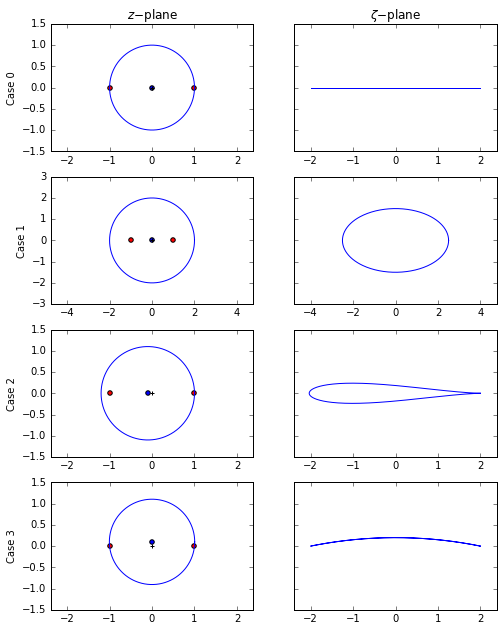

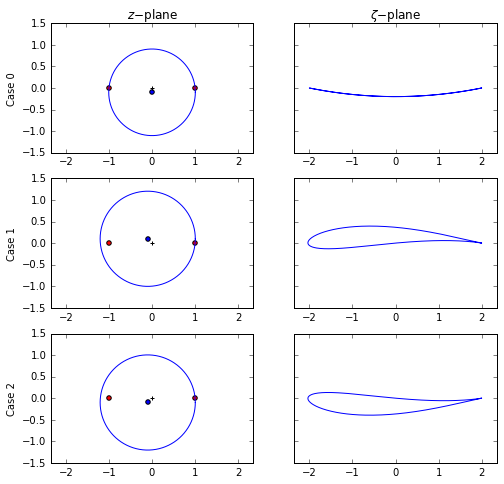

In [115]:
with PdfPages('tex/figs/q7_1.pdf') as pdf:
    fig1 = mkfig(cases[:4], 'Homework 7 Problem 1')
    fig1.text(0.5, 0.)
    pdf.savefig(fig1)
with PdfPages('tex/figs/q7_2.pdf') as pdf:
    fig2 = mkfig(cases[4:], 'Homework 7 Problem 1 contd.')
    pdf.savefig(fig2)